In [14]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from gtts import gTTS
import json
import re

In [2]:
fs, data = wavfile.read('joepass.wav')
data = data[:,0]

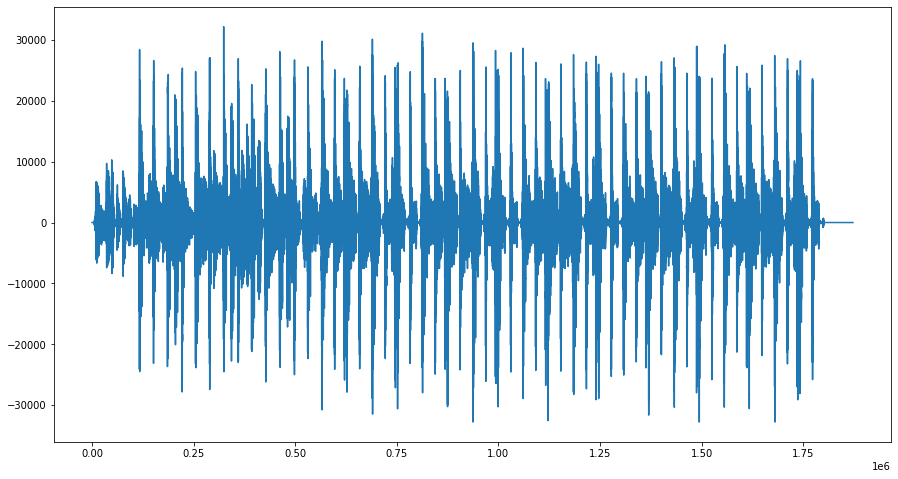

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(data)

In [4]:
lower, upper = pd.Series(data).quantile([.01, .99])

markers = []
for d in data:
    if d < lower or d > upper:
        markers.append(10000)
    else:
        markers.append(0)

markers = np.array(markers, dtype=np.int16)

<Figure size 432x288 with 0 Axes>

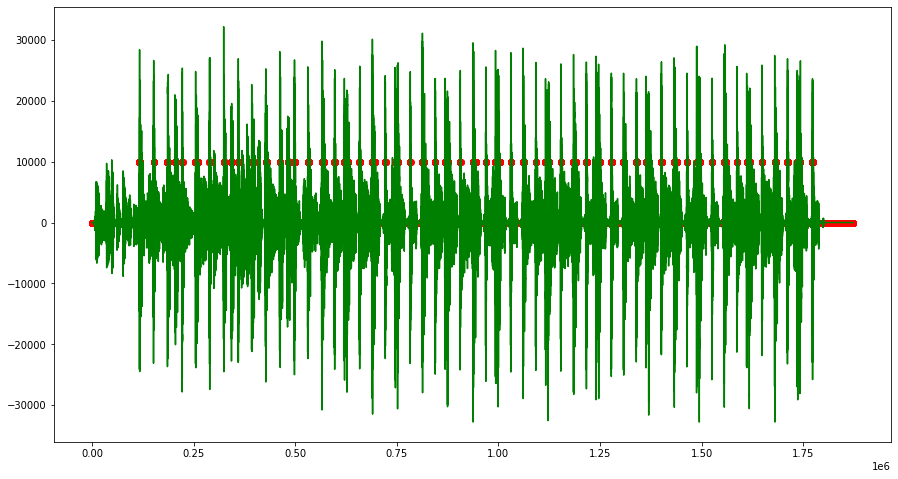

In [5]:
plt.clf()
plt.figure(figsize=(15, 8))
plt.plot(data, color='green')
plt.scatter(x=range(len(markers)), y=markers, color = 'red')
plt.show()

In [6]:
wavfile.write('beats.wav', fs, markers)

In [19]:

with open('phonetic_bars.json') as f:
    bars = json.load(f)
print(bars)

mytext = re.sub('-', '', ', '.join(bars))

language = 'en'
myobj = gTTS(text=mytext, lang='en', slow=False)
myobj.save("freestyle.mp3")
os.system("mpg321 freestyle.mp3")

['And last but not least, one of the ways I adore you', "And I'm not about to give up, I got-ta get out", 'Who said he was raw', 'I was re-vibed as soon as I take your top off', 'And do you hap-pen to have any-thing on you to in-spire me like you will ev-er get is', "But y'all are act-ing like I tried to warn ya when you start-ed to act weird", 'Lis-ten to the sound of my voice', 'We was on the couch if you wan-na run your mouth']


1

In [23]:
import requests

key = 'pub_eghlvbtkhsowaljwus'
secret = 'pk_09cfe043-e268-4b75-b361-4fd9121aa2d8'

url = "https://api.uberduck.ai/speak"

headers = {"Accept": "application/json"}

response = requests.request("POST", url, headers=headers, data='{"speech":"This is just a test.","voice":"zwf"}')

print(response.text)

{"detail":"Could not validate credentials"}
